In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

%matplotlib inline

### Load dataset

In [2]:
df_customers = pd.read_csv('data/customers.csv', header=0, index_col='CustomerID')
df_customers.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size
CustomerID,,,,,,,
1,67,2,124670,1,1,0,2
2,22,1,150773,1,0,1,2
3,49,1,89210,0,1,0,0
4,45,1,171565,1,1,0,1
5,53,1,149031,1,1,0,1


### Inspect

In [3]:
print('The dimention of the dataset\n')
print(df_customers.shape)

print('\nDetail description of the dataset\n')
print(df_customers.info())

The dimention of the dataset

(2000, 7)

Detail description of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              2000 non-null   int64
 1   Education        2000 non-null   int64
 2   Income           2000 non-null   int64
 3   Occupation       2000 non-null   int64
 4   Gender           2000 non-null   int64
 5   Marital Status   2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB
None


# Model Building

### Standardizing

In [4]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(df_customers)

### Elbow method

In [5]:
results = {}

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(customers_std)
    results[i] = kmeans.inertia_


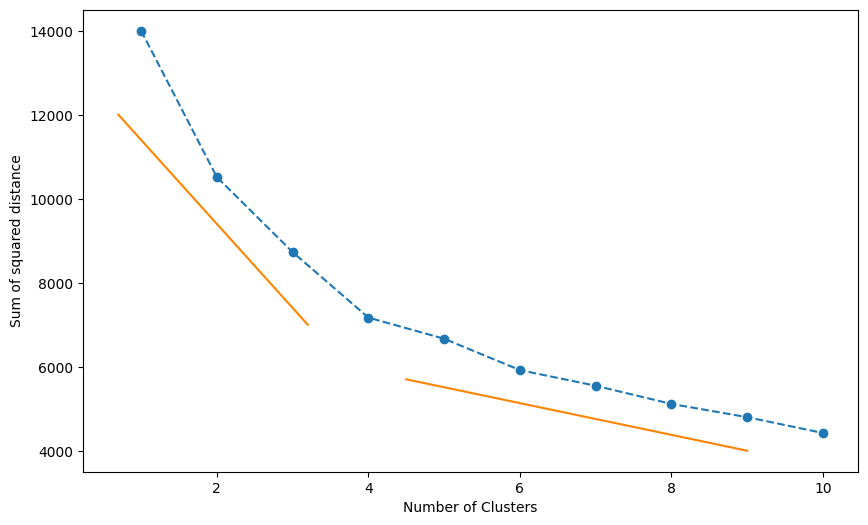

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.plot([0.7, 3.2], [12000, 7000], color='#FF8400')
plt.plot([4.5, 9], [5700, 4000], color='#FF8400')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### K-means segmentation with 4 clusters

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customers_std)

KMeans(n_clusters=4, random_state=42)

In [8]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = kmeans.labels_
df_customers_kmeans.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size,Segment
CustomerID,,,,,,,,
1,67,2,124670,1,1,0,2,3
2,22,1,150773,1,0,1,2,2
3,49,1,89210,0,1,0,0,0
4,45,1,171565,1,1,0,1,3
5,53,1,149031,1,1,0,1,3


### Analyze

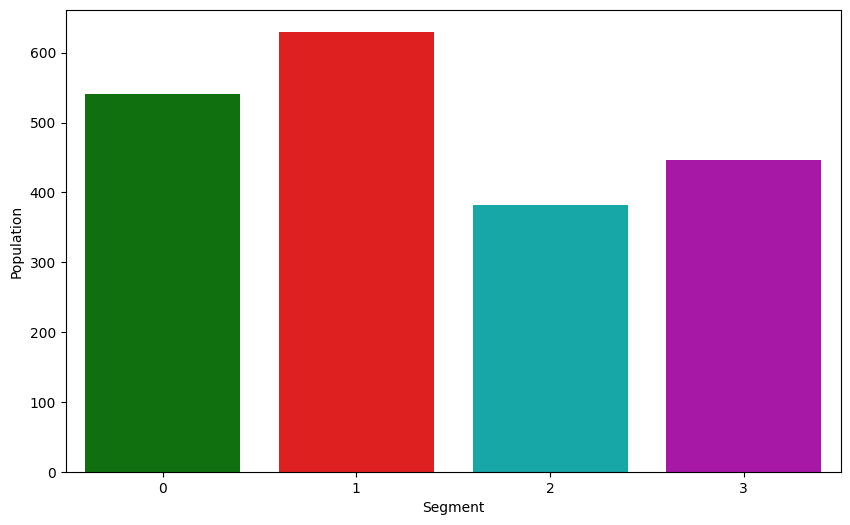

In [9]:
plt.figure(figsize=(10, 6))
s = sns.countplot(
    data=df_customers_kmeans,
    x='Segment',
    hue='Segment',
    palette=['g', 'r', 'c', 'm'],
    legend=False
)
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()